<a href="https://colab.research.google.com/github/alans123s/Pokemon_Data_Analysis/blob/main/Desafio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROCESSO DE TRAINEE TERRALAB 2021
---

**SPRINT 05**

**PROJETO 03**

**AUTORES:**

* Alan Souza Santandrea

---
**DESAFIO PROPOSTO:**

Desafio 03: Dada a base de dados DataBase o desenvolvedor deverá
(individualmente), através "insights", gerar resultados utilizando
técnicas de data analytics e gerar um relatório explicando seu
resultado.
---


In [ ]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv('/content/drive/MyDrive/DataAnalytics/Sprint - 01/DataSets/pokemon.csv')

In [ ]:
dataframe.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

# Separando o dataframe em 2 um de objetos e um numérico - df_obj e df_num

In [ ]:
df_obj = dataframe.select_dtypes(object)
legendary = dataframe['is_legendary']
df_obj = pd.concat([df_obj,legendary],axis=1)

df_obj.head()

,abilities,capture_rate,classfication,japanese_name,name,type1,type2,is_legendary
0,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigidaneフシギダネ,Bulbasaur,grass,poison,0
1,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigisouフシギソウ,Ivysaur,grass,poison,0
2,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigibanaフシギバナ,Venusaur,grass,poison,0
3,"['Blaze', 'Solar Power']",45,Lizard Pokémon,Hitokageヒトカゲ,Charmander,fire,NaN,0
4,"['Blaze', 'Solar Power']",45,Flame Pokémon,Lizardoリザード,Charmeleon,fire,NaN,0


In [ ]:
df_num = dataframe.drop(dataframe.select_dtypes(object).keys(),axis=1)
df_num.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,49,1059860,0.7,45,88.1,1,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,63,1059860,1.0,60,88.1,2,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,123,1059860,2.0,80,88.1,3,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,43,1059860,0.6,39,88.1,4,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,58,1059860,1.1,58,88.1,5,80,65,80,19.0,1,0


## Analisando as colunas de texto

In [ ]:
df_obj.head()

,abilities,capture_rate,classfication,japanese_name,name,type1,type2,is_legendary
0,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigidaneフシギダネ,Bulbasaur,grass,poison,0
1,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigisouフシギソウ,Ivysaur,grass,poison,0
2,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigibanaフシギバナ,Venusaur,grass,poison,0
3,"['Blaze', 'Solar Power']",45,Lizard Pokémon,Hitokageヒトカゲ,Charmander,fire,NaN,0
4,"['Blaze', 'Solar Power']",45,Flame Pokémon,Lizardoリザード,Charmeleon,fire,NaN,0


Coluna capture_rate apesar de ser um número apareceu como objeto. Isto é porque existe 1 linha com valor de texto para esse atributo


In [ ]:
df_obj['capture_rate'].value_counts()

45                          250
190                          75
255                          69
75                           61
3                            58
120                          55
60                           50
90                           38
30                           20
200                          19
225                          15
25                           13
180                          11
50                            7
150                           7
235                           7
140                           6
100                           6
127                           5
70                            4
65                            3
125                           3
55                            3
15                            2
170                           2
220                           2
130                           2
80                            2
145                           1
205                           1
35                            1
155     

### Analisando o pokemon com capture rate duplicada Minior


In [ ]:
#Linha de objetos dele
df_obj.loc[df_obj['capture_rate']=='30 (Meteorite)255 (Core)']

,abilities,capture_rate,classfication,japanese_name,name,type1,type2,is_legendary
773,['Shields Down'],30 (Meteorite)255 (Core),Meteor Pokémon,Metenoメテノ,Minior,rock,flying,0


In [ ]:
#Linha de números dele
df_num.loc[df_obj['capture_rate']=='30 (Meteorite)255 (Core)']

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
773,0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0,0.5,0.5,1.0,2.0,2.0,2.0,100,6400,70,500,60,1059860,0.3,60,NaN,774,100,60,120,40.0,7,0


Após rápida analise do pokemón e indo até o site de onde o autor da base realizou o scrapping podemos ver que ele usou os valores da base 'core', portanto vou mater o valor de 255 para este pokemon.

In [ ]:
df_obj.at[773,'capture_rate'] = 255 #Função df.at[] -- impede o problema de chained indexing.

df_obj['capture_rate'].value_counts()

45     250
190     75
255     69
75      61
3       58
120     55
60      50
90      38
30      20
200     19
225     15
25      13
180     11
50       7
150      7
235      7
140      6
100      6
127      5
70       4
65       3
125      3
55       3
15       2
170      2
130      2
220      2
80       2
145      1
205      1
35       1
255      1
155      1
160      1
Name: capture_rate, dtype: int64

Agora podemos voltar a coluna para valores numéricos.


In [ ]:
df_obj.loc[:,'capture_rate'] = df_obj['capture_rate'].astype(int)
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abilities      801 non-null    object
 1   capture_rate   801 non-null    int64 
 2   classfication  801 non-null    object
 3   japanese_name  801 non-null    object
 4   name           801 non-null    object
 5   type1          801 non-null    object
 6   type2          417 non-null    object
 7   is_legendary   801 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 50.2+ KB




---


Deixando a coluna abilities em uma forma melhor


---



A coluna abilities é uma string de lista de strings

O código abaixo irá transformá-la em listas de strings, e a função to_1D tem como propósito permitir algumas análises nessas listas.






In [ ]:
df_obj["abilities"] = df_obj["abilities"].apply(eval)
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [ ]:
to_1D(df_obj.loc[df_obj['is_legendary']==1,'abilities']).unique()

array(['Pressure', 'Snow Cloak', 'Static', 'Flame Body', 'Unnerve',
       'Synchronize', 'Inner Focus', 'Multiscale', 'Regenerator',
       'Natural Cure', 'Clear Body', 'Sturdy', 'Ice Body', 'Light Metal',
       'Levitate', 'Drizzle', 'Drought', 'Air Lock', 'Serene Grace',
       'Telepathy', 'Flash Fire', 'Slow Start', 'Hydration', 'Bad Dreams',
       'Multitype', 'Victory Star', 'Justified', 'Prankster', 'Defiant',
       'Volt Absorb', 'Turboblaze', 'Teravolt', 'Sand Force',
       'Sheer Force', 'Intimidate', 'Download', 'Fairy Aura', 'Dark Aura',
       'Aura Break', 'Power Construct', 'Magician', 'Water Absorb',
       'Electric Surge', 'Psychic Surge', 'Grassy Surge', 'Misty Surge',
       'Unaware', 'Full Metal Body', 'Shadow Shield', 'Beast Boost',
       'Prism Armor', 'Soul-Heart'], dtype=object)

### Analisando coluna Type2 visto que esta está com muitos valores faltando.

In [ ]:
df_obj[(df_obj['type2'].isnull())]

,abilities,capture_rate,classfication,japanese_name,name,type1,type2,is_legendary
3,"[Blaze, Solar Power]",45,Lizard Pokémon,Hitokageヒトカゲ,Charmander,fire,NaN,0
4,"[Blaze, Solar Power]",45,Flame Pokémon,Lizardoリザード,Charmeleon,fire,NaN,0
6,"[Torrent, Rain Dish]",45,Tiny Turtle Pokémon,Zenigameゼニガメ,Squirtle,water,NaN,0
7,"[Torrent, Rain Dish]",45,Turtle Pokémon,Kameilカメール,Wartortle,water,NaN,0
8,"[Torrent, Rain Dish]",45,Shellfish Pokémon,Kamexカメックス,Blastoise,water,NaN,0
...,...,...,...,...,...,...,...,...
781,"[Bulletproof, Soundproof, Overcoat]",45,Scaly Pokémon,Jyarakoジャラコ,Jangmo-o,dragon,NaN,0
788,[Unaware],45,Nebula Pokémon,Cosmogコスモッグ,Cosmog,psychic,NaN,1
789,[Sturdy],45,Protostar Pokémon,Cosmovumコスモウム,Cosmoem,psychic,NaN,1
795,[Beast Boost],30,Glowing Pokémon,Denjyumokuデンジュモク,Xurkitree,electric,NaN,1


In [ ]:
df_obj['type2'] = df_obj['type2'].replace(to_replace = np.nan, value = 'None')#Transforma os valores NaN em 'None' para análise

In [ ]:
total_legendary = len(dataframe[dataframe['is_legendary']==1])
total_legendary_1type = len(df_obj[(df_obj['is_legendary']==1) & (df_obj['type2']=='None')])

print(f'Quantidade Total de Pokemons lendários: {total_legendary}')
print(f'Quantidade de pokemons lendários com apenas 1 tipo: {total_legendary_1type}')
print(f'Porcentagem: {((total_legendary_1type/total_legendary)*100):.2f}%')

Quantidade Total de Pokemons lendários: 70
Quantidade de pokemons lendários com apenas 1 tipo: 25
Porcentagem: 35.71%


A função abaixo mostra que o valor das features Type1 e Type2 pode não ser util para separar os pokemons lendários dos não lendários.

In [ ]:
valores_all_1 = len(df_obj[df_obj['is_legendary']== 0]['type1'].unique())
valores_legendary_1 = len(df_obj[df_obj['is_legendary']== 1]['type1'].unique())

valores_all_2 = len(df_obj[df_obj['is_legendary']== 0]['type2'].unique())
valores_legendary_2 = len(df_obj[df_obj['is_legendary']== 1]['type2'].unique())

print(f'Quantidade de valores unicos em Type1 para o geral: {valores_all_1} \
\nQuantidade de valores únicos em Type1 para lendários: {valores_legendary_1} \
\n\nQuantidade de valores unicos em Type2 para o geral: {valores_all_2} \
\nQuantidade de valores únicos em Type2 para lendários: {valores_legendary_2}')

Quantidade de valores unicos em Type1 para o geral: 18 
Quantidade de valores únicos em Type1 para lendários: 16 

Quantidade de valores unicos em Type2 para o geral: 19 
Quantidade de valores únicos em Type2 para lendários: 15


---
**Conclui através desta análise que não devemos retirar a coluna de type2, mesmo que ela tenha muitos valores faltantes. Porém a informação de qual o tipo 2 do pokemon não aparenta ser muito útil, talvez seja melhor trasmormar as colunas de Type1 e Type2 em possui_2_tipos[0,1]**.

---

In [ ]:
df_obj['possui_2_tipos'] = np.nan


In [ ]:
df_obj['possui_2_tipos'] = np.nan
for i in range(len(df_obj)): 
    if df_obj.loc[i,'type2'] != 'None':  
        df_obj.loc[i,'possui_2_tipos'] = 1
    else:
        df_obj.loc[i,'possui_2_tipos'] = 0 

# df_obj.drop(['type1','type2'],axis=1,inplace=True)

df_obj.head()

,abilities,capture_rate,classfication,japanese_name,name,type1,type2,is_legendary,possui_2_tipos
0,"[Overgrow, Chlorophyll]",45,Seed Pokémon,Fushigidaneフシギダネ,Bulbasaur,grass,poison,0,1.0
1,"[Overgrow, Chlorophyll]",45,Seed Pokémon,Fushigisouフシギソウ,Ivysaur,grass,poison,0,1.0
2,"[Overgrow, Chlorophyll]",45,Seed Pokémon,Fushigibanaフシギバナ,Venusaur,grass,poison,0,1.0
3,"[Blaze, Solar Power]",45,Lizard Pokémon,Hitokageヒトカゲ,Charmander,fire,None,0,0.0
4,"[Blaze, Solar Power]",45,Flame Pokémon,Lizardoリザード,Charmeleon,fire,None,0,0.0


##Continuação da analise das colunas de texto

In [ ]:

def compara_len_vs_resto (feature,dataframe):
    '''
    Função que compara os valores dos pokemons lendários vs os não lendários.
    PARAMETERS
    --- --- 
    Inputs:

    data - O dataset para comparar
    feature - O nome da coluna que gostariamos de realizar a comparação. Ex:'Type1'
    Output: Fala quais atributos são exclusivos dos pokemons lendários.

    Return: list_att - Lista com os atributos que são únicos dos pokemons lendários.
    '''

    if any(dataframe[feature].isnull()):
        dataframe[feature] = dataframe[feature].replace(to_replace = np.nan, value = 'None')#garante a comparação entre np.NaN
    else:
        pass

    data1 = dataframe[dataframe['is_legendary']== 0][feature]
    data2 = dataframe[dataframe['is_legendary']== 1][feature]

    if type(dataframe[dataframe['is_legendary']== 0][feature][1]) != list:

        nao_lendario = data1.unique()
        lendario = data2.unique()


    else:
        lendario = []
        nao_lendario =[]
        for pod_len in data2:
            for poder in pod_len:
                lendario.append(poder)
        for pod_nlen in data1:
            for poder in pod_nlen:
                nao_lendario.append(poder)


    list_att = []
    for att in set(lendario):
        if att not in set(nao_lendario):
            list_att.append(att)
    
    print(f'Total de instancias testadas: {len(set(lendario))} \
    \nTotal de instancias: {len(set(nao_lendario))} \
    \nOs atributos exclusivos de lendarios para a feature: {feature} foram {len(list_att)}\
    \nsão eles: {set(list_att)}')
    return list_att

###Analise da coluna poderes de forma separada

In [ ]:
poder = compara_len_vs_resto(feature='abilities',dataframe=df_obj)

Total de instancias testadas: 52     
Total de instancias: 207     
Os atributos exclusivos de lendarios para a feature: abilities foram 20    
são eles: {'Beast Boost', 'Bad Dreams', 'Power Construct', 'Full Metal Body', 'Slow Start', 'Dark Aura', 'Shadow Shield', 'Air Lock', 'Turboblaze', 'Grassy Surge', 'Electric Surge', 'Misty Surge', 'Teravolt', 'Psychic Surge', 'Fairy Aura', 'Prism Armor', 'Multitype', 'Soul-Heart', 'Victory Star', 'Aura Break'}


In [ ]:
capture_r  = compara_len_vs_resto(feature='capture_rate',dataframe=df_obj)

Total de instancias testadas: 6     
Total de instancias: 33     
Os atributos exclusivos de lendarios para a feature: capture_rate foram 0    
são eles: set()




---


O código acima registra apenas 6 valores de capture_rate para os pokemons lendários. Resolvi ohar quais são eles.



---



In [ ]:
df_obj.loc[df_obj['is_legendary']==1,'capture_rate'].unique() #Valor anormal de 255

array([  3,  45,  25, 255,  30,  15])



---



Como esperado, a taxa de captura dos pokemons lendários tende a ser bem baixa. Entretanto existe um valor anormal de 255 também.  

Vamos olhar quais pokemons possuem esta taxa de captura.


---



In [ ]:
df_obj.loc[(df_obj['is_legendary']==1) & (df_obj['capture_rate']==255)]

,abilities,capture_rate,classfication,japanese_name,name,type1,type2,is_legendary,possui_2_tipos
794,[Beast Boost],255,Lissome Pokémon,Pheroacheフェローチェ,Pheromosa,bug,fighting,1,1.0
797,[Beast Boost],255,Drawn Sword Pokémon,Kamiturugiカミツルギ,Kartana,grass,steel,1,1.0


Estes Pokemons compartilham de um mesmo poder, vamos olhar outros pokemons com este poder.


In [ ]:
def busca_por_poder(poder,data,return_data=True):
    '''
    Função que retorna os index dos pokemons com determinados poderes.
    A função funciona para 2 tipos de entrada de dados que eu criei 

    PARAMETROS
    ---
    ENTRADA

    poder: str com nome do poder
    data: base de dados
    mult_cols: bool, padrão= False, caso data possua mais de uma coluna guardando poderes.

    SAIDA

    index: pokemons que possuam tal poder na base de dados
    '''

    index = []
    # if mult_cols == True:
    #     cols = ['poder1',	'poder2',	'poder3',	'poder4',	'poder5',	'poder6']
    #     for col in data[cols]:
    #         for i in range(len(data)):
    #             if df_abilities[col][i] == poder: index.append(i)
                
    #else:
    col = data['abilities']
    for i in range(len(col)):
        if any(x in poder for x in col[i]):index.append(i)

    return data.loc[list(set(index))] if return_data else index
    

Usando a função acima para plotar todos os lendários com poderes únicos que os diferem dos não lendários

In [ ]:
busca_por_poder('Beast Boost',df_obj)


,abilities,capture_rate,classfication,japanese_name,name,type1,type2,is_legendary,possui_2_tipos
792,[Beast Boost],45,Parasite Pokémon,Uturoidウツロイド,Nihilego,rock,poison,1,1.0
793,[Beast Boost],25,Swollen Pokémon,Massivoonマッシブーン,Buzzwole,bug,fighting,1,1.0
794,[Beast Boost],255,Lissome Pokémon,Pheroacheフェローチェ,Pheromosa,bug,fighting,1,1.0
795,[Beast Boost],30,Glowing Pokémon,Denjyumokuデンジュモク,Xurkitree,electric,None,1,0.0
796,[Beast Boost],25,Launch Pokémon,Tekkaguyaテッカグヤ,Celesteela,steel,flying,1,1.0
797,[Beast Boost],255,Drawn Sword Pokémon,Kamiturugiカミツルギ,Kartana,grass,steel,1,1.0
798,[Beast Boost],15,Junkivore Pokémon,Akuzikingアクジキング,Guzzlord,dark,dragon,1,1.0



Novamente, uam rápida análise em cima destes pokemons mostram q sua taxa de captura esta errada. Vamos colocar seus valores para 45


In [ ]:
#Removendo os valores de 255 da base
df_obj.loc[(df_obj['is_legendary']==1) & (df_obj['capture_rate']==255),'capture_rate'] = 45

O código abaixo irá retornar um dataset contendo todos os pokemons com poderes que os comuns não possuem.

In [ ]:
data = pd.DataFrame()
for x in poder: 
    data = pd.concat([data,busca_por_poder(poder,df_obj)],axis=0)
data.drop_duplicates(subset=['name'],inplace=True)
data.head()

,abilities,capture_rate,classfication,japanese_name,name,type1,type2,is_legendary,possui_2_tipos
642,[Turboblaze],3,Vast White Pokémon,Reshiramレシラム,Reshiram,dragon,fire,1,1.0
643,[Teravolt],3,Deep Black Pokémon,Zekromゼクロム,Zekrom,dragon,electric,1,1.0
645,"[Pressure, Teravolt, Turboblaze]",3,Boundary Pokémon,Kyuremキュレム,Kyurem,dragon,ice,1,1.0
784,"[Electric Surge, Telepathy]",3,Land Spirit Pokémon,Kapu-kokekoカプ・コケコ,Tapu Koko,electric,fairy,1,1.0
785,"[Psychic Surge, Telepathy]",3,Land Spirit Pokémon,Kapu-tetefuカプ・テテフ,Tapu Lele,psychic,fairy,1,1.0


##Aqui estamos transformando as colunas abilities em 6 novas colunas de poder, contendo em cada uma 1 poder do pokemon ou 'none' caso o pokemon não tenha mais poderes

In [ ]:
# df_abilities = df_obj["abilities"].apply(pd.Series)
# df_abilities.fillna(value='None',inplace=True)
# df_abilities = pd.concat([df_abilities,legendary],axis=1)
# df_abilities.rename({0:'poder1',1:'poder2',2:'poder3',3:'poder4',4:'poder5',5:'poder6'}, axis='columns',inplace=True)

# df_obj_new = pd.concat([df_obj,df_abilities],axis=1)

# df_obj_new.drop('abilities',axis=1,inplace=True)




# Alguns gráficos 

In [ ]:
df_num  = pd.concat([df_obj.select_dtypes(exclude=object).drop('is_legendary',axis=1),df_num],axis=1) #Joga todos os valores numéricos para df_num

In [ ]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

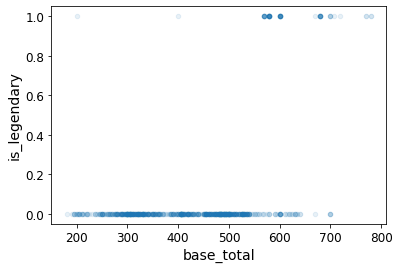

In [ ]:
df_num.plot(kind="scatter", x="base_total", y="is_legendary",alpha = 0.1)

---
hmmmmm aparentemente os lendários possuem status base mais altos acima de 500.

Porém alguns pontos ainda aprecem abaixo dos 500, vamos dar uma olhada neles


In [ ]:
df_obj.loc[(df_num['base_total']<500)&(df_num['is_legendary']==1)]

,abilities,capture_rate,classfication,japanese_name,name,type1,type2,is_legendary,possui_2_tipos
788,[Unaware],45,Nebula Pokémon,Cosmogコスモッグ,Cosmog,psychic,None,1,0.0
789,[Sturdy],45,Protostar Pokémon,Cosmovumコスモウム,Cosmoem,psychic,None,1,0.0


Estes pokemons são realmente muito fracos. Poderiamos descartá-los 

In [ ]:
corr_matrix = df_num.corr()
corr_matrix["is_legendary"].sort_values(ascending=False)

is_legendary         1.000000
base_egg_steps       0.873488
base_total           0.485440
sp_attack            0.406281
weight_kg            0.393023
experience_growth    0.361038
sp_defense           0.343241
height_m             0.322155
speed                0.311639
hp                   0.308405
attack               0.303295
defense              0.265587
pokedex_number       0.196785
against_ghost        0.170746
generation           0.139029
against_dark         0.136315
possui_2_tipos       0.075730
against_fairy        0.050165
percentage_male      0.045222
against_bug          0.027864
against_dragon       0.014844
against_ground       0.012812
against_ice          0.005580
against_steel        0.001397
against_fire        -0.011073
against_rock        -0.017588
against_water       -0.020679
against_electric    -0.023151
against_poison      -0.024349
against_normal      -0.034761
against_fight       -0.059132
against_flying      -0.062214
against_grass       -0.070826
against_ps

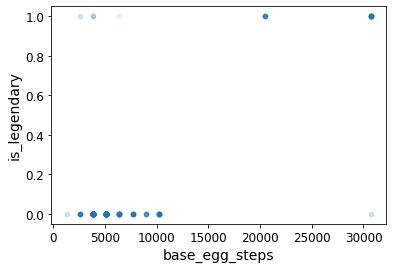

In [ ]:
df_num.plot(kind="scatter", x="base_egg_steps", y="is_legendary",alpha = 0.1)

In [ ]:
df_obj.loc[(df_num['base_egg_steps']>30000)&(df_num['is_legendary']==0)]

,abilities,capture_rate,classfication,japanese_name,name,type1,type2,is_legendary,possui_2_tipos
771,[Battle Armor],3,Synthetic Pokémon,Type: Nullタイプ：ヌル,Type: Null,normal,None,0,0.0
772,[RKS System],3,Synthetic Pokémon,Silvadyシルヴァディ,Silvally,normal,None,0,0.0


In [ ]:
df_obj.loc[(df_num['base_egg_steps']<10000)&(df_num['is_legendary']==1)]

,abilities,capture_rate,classfication,japanese_name,name,type1,type2,is_legendary,possui_2_tipos
484,"[Flash Fire, Flame Body]",3,Lava Dome Pokémon,Heatranヒードラン,Heatran,fire,steel,1,1.0
489,[Hydration],3,Seafaring Pokémon,Manaphyマナフィ,Manaphy,water,None,1,0.0
718,[Clear Body],3,Jewel Pokémon,Diancieディアンシー,Diancie,rock,fairy,1,1.0
784,"[Electric Surge, Telepathy]",3,Land Spirit Pokémon,Kapu-kokekoカプ・コケコ,Tapu Koko,electric,fairy,1,1.0
785,"[Psychic Surge, Telepathy]",3,Land Spirit Pokémon,Kapu-tetefuカプ・テテフ,Tapu Lele,psychic,fairy,1,1.0
786,"[Grassy Surge, Telepathy]",3,Land Spirit Pokémon,Kapu-bululカプ・ブルル,Tapu Bulu,grass,fairy,1,1.0
787,"[Misty Surge, Telepathy]",3,Land Spirit Pokémon,Kapu-rehireカプ・レヒレ,Tapu Fini,water,fairy,1,1.0


In [ ]:
df_num.loc[(df_num['base_egg_steps']>30000)&(df_num['is_legendary']==0),'is_legendary'] = 1

In [ ]:
from matplotlib import colors

def map_color(f1,f2,fs,fc,data,d=5,a=0.4):

    data.plot(kind="scatter", x=f1, y=f2,alpha = a,
                s=data[fs]/d,label=fs,figsize=(10,7),
                c=fc,cmap= plt.get_cmap('jet'),colorbar=True,
                sharex=False)

    plt.legend()


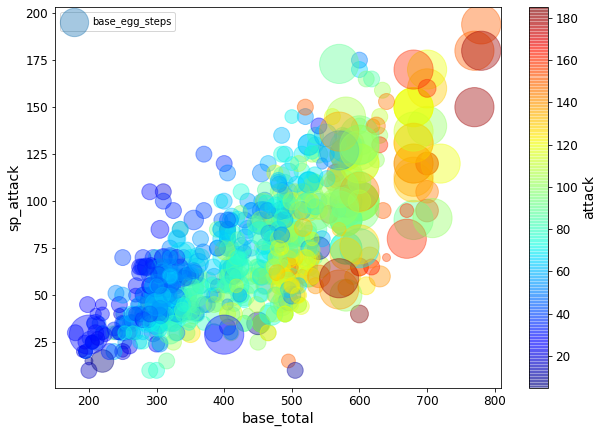

In [ ]:
# map_color('base_total','sp_attack','weight_kg','is_legendary',df_num,a=1)
map_color('base_total','sp_attack','base_egg_steps','attack',df_num,d=20,a=0.4)
# map_color('base_total','capture_rate','base_egg_steps','is_legendary',df_num,d=20,a=0.4)
# map_color('base_egg_steps','percentage_male','weight_kg','is_legendary',df_num,d=0.4,a=0.4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f560db050>,
      dtype=object)

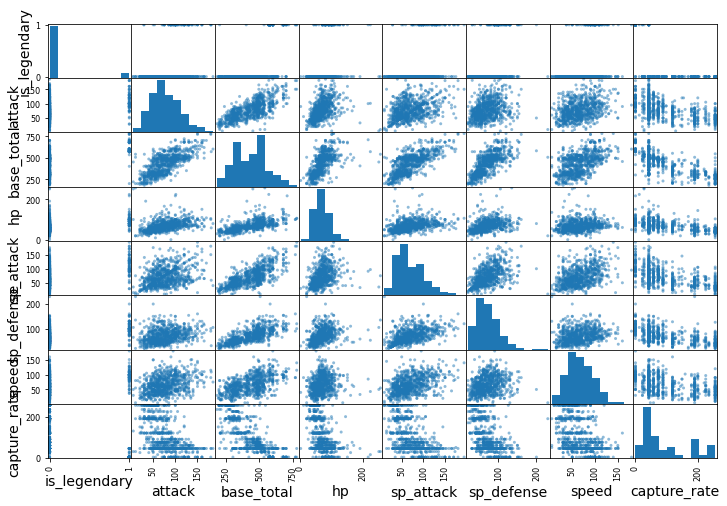

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['is_legendary','attack','base_total','hp','sp_attack','sp_defense','speed','capture_rate']

scatter_matrix(df_num[attributes], figsize=(12, 8))


In [ ]:
corr_matrix["base_total"].sort_values(ascending=False)

base_total           1.000000
sp_attack            0.741120
attack               0.730134
sp_defense           0.717434
defense              0.629620
hp                   0.620624
speed                0.547666
height_m             0.535063
base_egg_steps       0.496466
is_legendary         0.485440
weight_kg            0.458111
experience_growth    0.256930
possui_2_tipos       0.153234
pokedex_number       0.140363
against_ghost        0.114179
against_fairy        0.098948
percentage_male      0.098462
generation           0.084358
against_dragon       0.069766
against_dark         0.065446
against_ground       0.064252
against_fight        0.048629
against_water        0.024011
against_ice          0.021909
against_steel       -0.006741
against_bug         -0.012398
against_electric    -0.017137
against_grass       -0.017340
against_rock        -0.038083
against_fire        -0.061698
against_poison      -0.097396
against_normal      -0.105328
against_psychic     -0.106435
against_fl

# Analisando as colunas numéricas

In [ ]:
df_num.head()

,capture_rate,possui_2_tipos,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,45,1.0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,49,1059860,0.7,45,88.1,1,65,65,45,6.9,1,0
1,45,1.0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,63,1059860,1.0,60,88.1,2,80,80,60,13.0,1,0
2,45,1.0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,123,1059860,2.0,80,88.1,3,122,120,80,100.0,1,0
3,45,0.0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,43,1059860,0.6,39,88.1,4,60,50,65,8.5,1,0
4,45,0.0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,58,1059860,1.1,58,88.1,5,80,65,80,19.0,1,0


In [ ]:
df_num.describe()

,capture_rate,possui_2_tipos,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,98.431960,0.520599,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.089888
std,76.056497,0.499888,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.286199
min,3.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,45.000000,0.000000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,160.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,255.000000,1.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [ ]:
df_num.isnull().sum()

capture_rate          0
possui_2_tipos        0
against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
defense               0
experience_growth     0
height_m             20
hp                    0
percentage_male      98
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            20
generation            0
is_legendary          0
dtype: int64

In [ ]:
df_num.loc[df_num['percentage_male'].isnull(),'percentage_male'] = -1

In [ ]:
df_obj.loc[df_num['height_m'].isnull(),'name']

18       Rattata
19      Raticate
25        Raichu
26     Sandshrew
27     Sandslash
36        Vulpix
37     Ninetales
49       Diglett
50       Dugtrio
51        Meowth
52       Persian
73       Geodude
74      Graveler
75         Golem
87        Grimer
88           Muk
102    Exeggutor
104      Marowak
719        Hoopa
744     Lycanroc
Name: name, dtype: object

In [ ]:
dados = [(0.3,3.5),(0.7,18.5),(0.8,30),(0.6,12),(1,29.5),(0.6,9.9),(1.1,19.9),(0.2,0.8),(0.7,33.3),
         (0.4,4.2),(1,32),(0.4,20),(1,105),(1.4,300),(0.9,30),(1.2,30),(2,120),(1,45),(0.5,9),(0.8,25)]


In [ ]:
df_num.loc[(df_num['height_m'].isnull()),['height_m','weight_kg']] = dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f5608f2d0>,
      dtype=object)

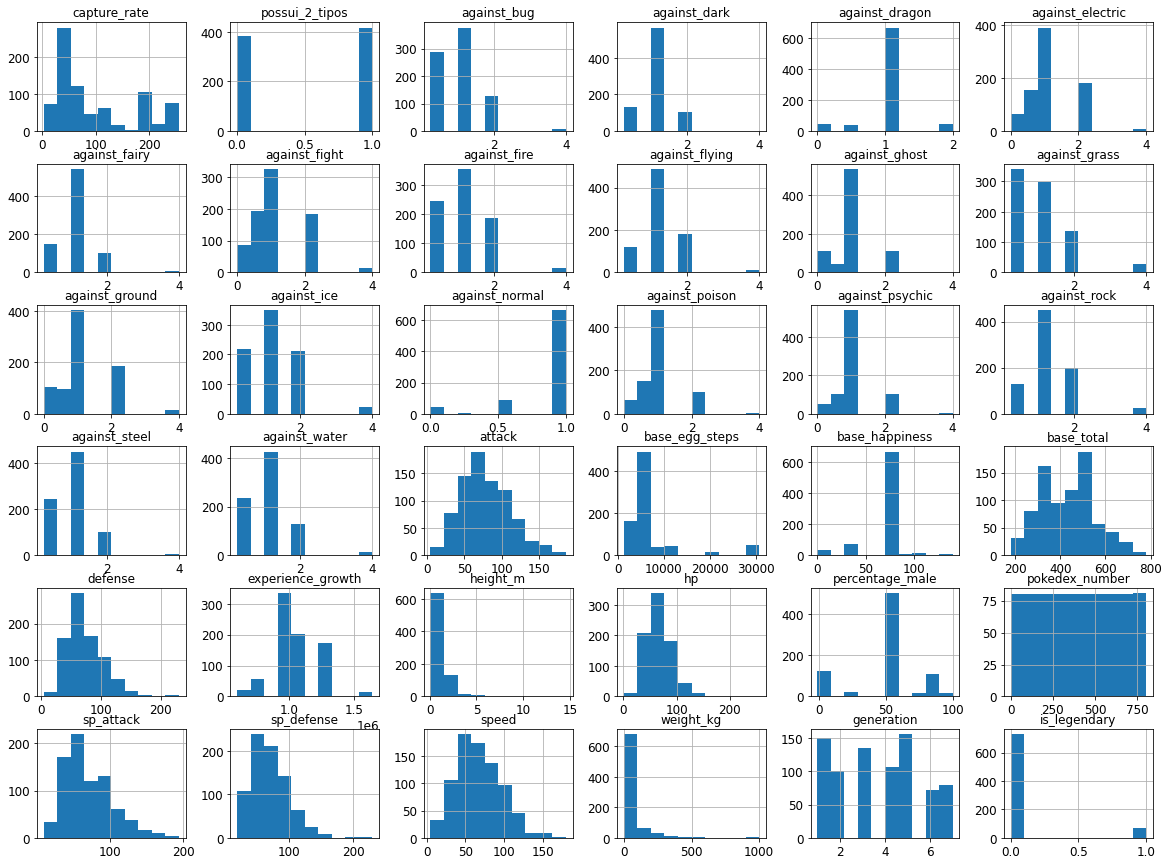

In [ ]:
# To plot pretty figures
%matplotlib inline

df_num.hist(figsize=(20,15))

#Classificação 

##Talvez a taxa de captura seja nosso melhor atributo para determinar se o pokemon é lendário ou não, portanto vou montar a base de treino e teste de forma estratificada e mantendo a porporção dessa feature.

In [ ]:
df_complete = pd.concat([df_obj,df_num],axis=1)
df_complete.head()

,abilities,capture_rate,classfication,japanese_name,name,type1,type2,is_legendary,possui_2_tipos,capture_rate,possui_2_tipos,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,"[Overgrow, Chlorophyll]",45,Seed Pokémon,Fushigidaneフシギダネ,Bulbasaur,grass,poison,0,1.0,45,1.0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,49,1059860,0.7,45,88.1,1,65,65,45,6.9,1,0
1,"[Overgrow, Chlorophyll]",45,Seed Pokémon,Fushigisouフシギソウ,Ivysaur,grass,poison,0,1.0,45,1.0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,63,1059860,1.0,60,88.1,2,80,80,60,13.0,1,0
2,"[Overgrow, Chlorophyll]",45,Seed Pokémon,Fushigibanaフシギバナ,Venusaur,grass,poison,0,1.0,45,1.0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,123,1059860,2.0,80,88.1,3,122,120,80,100.0,1,0
3,"[Blaze, Solar Power]",45,Lizard Pokémon,Hitokageヒトカゲ,Charmander,fire,None,0,0.0,45,0.0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,43,1059860,0.6,39,88.1,4,60,50,65,8.5,1,0
4,"[Blaze, Solar Power]",45,Flame Pokémon,Lizardoリザード,Charmeleon,fire,None,0,0.0,45,0.0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,58,1059860,1.1,58,88.1,5,80,65,80,19.0,1,0


In [ ]:
df_num['capture_cat'] = pd.cut(df_num['capture_rate'],
                                    bins = [0,45,100,200,np.inf],
                                    labels=[1,2,3,4])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df_num,df_num['capture_cat']):
    strat_train_set = df_num.loc[train_index]
    strat_test_set = df_num.loc[test_index]

In [ ]:
strat_test_set['capture_cat'].value_counts()/len(strat_test_set)

1    0.428571
3    0.236025
2    0.217391
4    0.118012
Name: capture_cat, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

def capture_cat_proportions(data):
    return data["capture_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df_num, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": capture_cat_proportions(df_num),
    "Stratified": capture_cat_proportions(strat_test_set),
    "Random": capture_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.431960,0.428571,0.391304,-9.411913,-0.784476
2,0.217228,0.217391,0.310559,42.964232,0.074963
3,0.234707,0.236025,0.186335,-20.609224,0.561649
4,0.116105,0.118012,0.111801,-3.706672,1.642957


In [ ]:
for set_ in (strat_test_set,strat_train_set,df_num):
    set_.drop('capture_cat',axis=1,inplace=True)



In [ ]:
X_train = strat_train_set.drop('is_legendary',inplace=False,axis=1)
y_train = strat_train_set['is_legendary']

In [ ]:
X_test = strat_test_set.drop('is_legendary',inplace=False,axis=1)
y_test = strat_test_set['is_legendary']

## PCA nos dados numéricos

In [ ]:
X_train.select_dtypes(exclude=object)

,capture_rate,possui_2_tipos,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation
721,45,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.25,0.0,4.00,1.0,2.0,1.0,2.0,1.0,0.5,55,3840,70,320,55,1059860,0.3,68,88.1,722,50,50,42,1.5,7
181,45,0.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,0.50,0.5,2.00,1.0,2.0,1.0,1.0,1.0,0.5,80,5120,70,490,95,1059860,0.4,75,50.0,182,90,100,50,5.8,2
217,190,0.0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.50,1.0,1.0,1.0,2.0,0.5,2.0,40,5120,70,250,40,1000000,0.7,40,50.0,218,70,40,20,35.0,2
116,75,0.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.50,1.0,1.0,1.0,1.0,0.5,0.5,65,5120,70,440,95,1000000,1.2,55,50.0,117,95,45,85,25.0,1
715,45,0.0,0.5,0.5,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.00,1.0,1.00,1.0,2.0,1.0,1.0,2.0,1.0,131,30720,0,680,95,1250000,3.0,126,-1.0,716,131,98,99,215.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,50,0.0,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.00,1.0,1.0,0.5,1.0,1.0,1.0,50,5120,70,600,65,1059860,1.5,55,75.4,65,175,105,150,48.0,1
199,45,0.0,0.5,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.00,1.0,1.00,0.0,0.5,1.0,1.0,1.0,1.0,60,6400,35,435,60,800000,0.7,60,50.0,200,85,85,85,1.0,2
362,255,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.00,1.0,0.25,1.0,1.0,1.0,2.0,1.0,0.5,40,5120,70,290,50,1059860,0.8,70,50.0,363,55,50,25,39.5,3
397,45,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.50,0.0,2.00,1.0,1.0,1.0,2.0,1.0,1.0,120,3840,70,485,70,1059860,1.2,85,50.0,398,50,60,100,24.9,4


In [ ]:
X_train = X_train.astype(np.float64)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train.select_dtypes(exclude=object))
X_train_recovered = pca.inverse_transform(X_train_reduced)

No handles with labels found to put in legend.


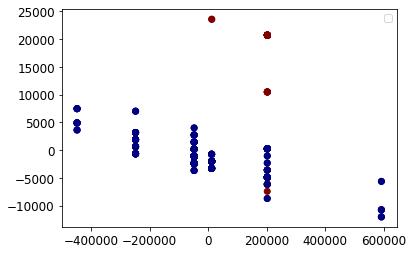

In [ ]:
plt.scatter(x=X_train_reduced[:,0],y=X_train_reduced[:,1],
                c=y_train,cmap= plt.get_cmap('jet'))
plt.legend()

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9999967011439718

In [ ]:
## For modelling :
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Modelling tools :
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [ ]:
print("Training took {:.2f}s".format(t1 - t0))


Training took 0.20s


In [ ]:
y_pred = rnd_clf.predict(X_test)
RF = accuracy_score(y_test, y_pred)
print(RF)

1.0


In [ ]:
predict = pd.DataFrame(data = y_test.values.reshape(-1),columns=['Esperado'])
predict['Previsto'] = (pd.Series(y_pred, index=predict.index))

In [ ]:
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


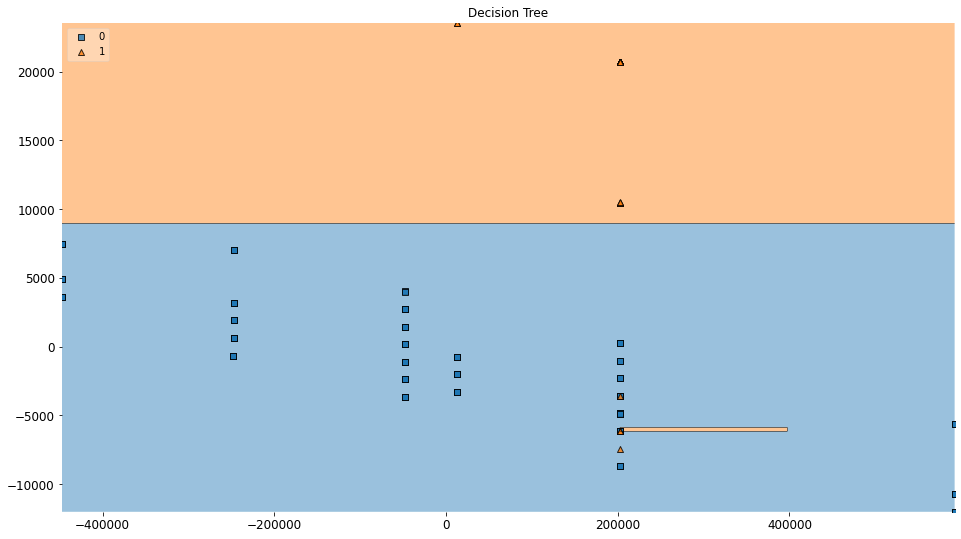

In [ ]:
from mlxtend.plotting import plot_decision_regions

y_array = np.asarray(y_train)
plt.figure(figsize=(16,9))
plot_decision_regions(X_train_reduced, y_array, clf=rnd_clf2, legend=2)


plt.title('Decision Tree')
plt.show()

# Chamando a função criada anteriormente:


Talvez não seja o melhor modelo, aparentemente o modelo esta com overfitting, mas aqui podemos evidenciar que o PCA dividiu muito bem as classes. Talvez uma cross - validation seja necessária para ver a real acurácia do modelo.

In [ ]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 0.18s


In [ ]:
X_test_reduced = pca.transform(X_test)

y_pred= rnd_clf2.predict(X_test_reduced)
RF_PCA = accuracy_score(y_test, y_pred)
print(RF_PCA)

1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression())

t0 = time.time()
pipe.fit(X_train, y_train)  # apply scaling on training data
t1 = time.time()

linear =  pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.
print(linear)

0.9751552795031055


In [ ]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 0.02s


In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

t0 = time.time()
pipe.fit(X_train_reduced, y_train)  # apply scaling on training data
t1 = time.time()

linear_PCA = pipe.score(X_test_reduced, y_test) 
print(linear_PCA)

0.9813664596273292


In [ ]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 0.02s


In [ ]:
print(f'Acurácia Rand.Forest s/ PCA: {RF*100}%\
\nAcurácia Rand.Forest c/ PCA: {RF_PCA*100}%\
\n\nAcurácia LinearReg. s/ PCA: {linear*100:.2f}%\
\nAcurácia LinearReg. c/ PCA: {linear_PCA*100:.2f}%') 



Acurácia Rand.Forest s/ PCA: 100.0%
Acurácia Rand.Forest c/ PCA: 100.0%

Acurácia LinearReg. s/ PCA: 97.52%
Acurácia LinearReg. c/ PCA: 98.14%


# Vamo brincar um pouco 

Dividir os Pokémons em 2 classes, parece com uma tarefa um tanto quanto trivial.

que tal criarmos 5 classes?
---
1.Lendários

2.Épicos

3.Raros

4.Incomuns

5.Comuns

Para isso, minha idéia é usar usar 2 atributos, um de '***Power***' criado pela função abaixo e o outro é o attack, devido a sua alta correlação com a variável '***base_total***', que é bem próxima do atributo criado.

## Função

Considerando que os pokemóns lendários possuem status base mais alto, vou criar uma função simples que leva em conta os atributos: 

* attack = A

* defense = D

* speed = S

* Sp_attack = SA

* Sp_defense = SD

E as colunas *Against_n* para criar um embeeding que representa o pokemon, para depois agrupá-los em algumas classes de poder.

OBS: Os atributos foram padronizado usando StandartScaler.


Função criada
===


1. $$BT = \sum_{k=1}^{N}(A + D + S + SA + SD)*Against\_N $$



Against\_n deve ser carregado em uma lista para passar para a função.

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler 
def BaseTotal(df,scaler = False):
    if scaler:

        X = df.loc[:,['attack','defense','speed','sp_attack','sp_defense','hp']].copy()
        X_scale = StandardScaler().fit_transform(X) 
        X = pd.DataFrame(X_scale,columns=['attack','defense','speed','sp_attack','sp_defense','hp'])
        df_ = X
    else: df_ = df

    BT = []
    against = df[[n for n in df.keys() if "against" in n]]
    list_against = list(against.values)

    for i in range(len(df)):
        
        A = df_.at[i,'attack']
        D = df_.at[i,'defense']
        S = df_.at[i,'speed']
        SA = df_.at[i,'sp_attack']
        SD = df_.at[i,'sp_defense']
        HP = df_.at[i,'hp']
        total = sum(np.dot((A+D+S+SA+SD+HP),list_against.pop(0)).T)
        BT.insert(i,total)

    return BT



###Gerando 2 resultados usando a função acima um padronizado e outro não

In [ ]:
BT_scale = BaseTotal(df_num,scaler=True)
BT_raw = BaseTotal(df_num)

In [ ]:
BT_scale_serie = pd.Series(BT_scale,name='Power')
BT_raw_serie = pd.Series(BT_raw,name='Power')

### Gerando 2 datasets, colunas ['Poder' ,  'is_legendary' , 'attack'].

Aqui repetirei os dados de attack.

In [ ]:
corr_matrix = df_num[['sp_attack','attack','sp_defense','defense','hp','speed','capture_rate','base_total']].corr()
corr_matrix["base_total"].sort_values(ascending=False)

base_total      1.000000
sp_attack       0.741120
attack          0.730134
sp_defense      0.717434
defense         0.629620
hp              0.620624
speed           0.547666
capture_rate   -0.720056
Name: base_total, dtype: float64

In [ ]:
X = df_num.loc[:,['attack']].copy()
X_attack = StandardScaler().fit_transform(X)
X_attack = pd.DataFrame(X_attack,columns=['sp_attack'])

In [ ]:
df_scale_stat = pd.concat((BT_scale_serie,legendary),axis=1)
df_scale_stat = pd.concat((df_scale_stat,X_attack),axis=1)

df_raw_serie = pd.concat((BT_raw_serie,legendary),axis=1)
df_raw_serie = pd.concat((df_raw_serie,df_num['sp_attack']),axis=1)

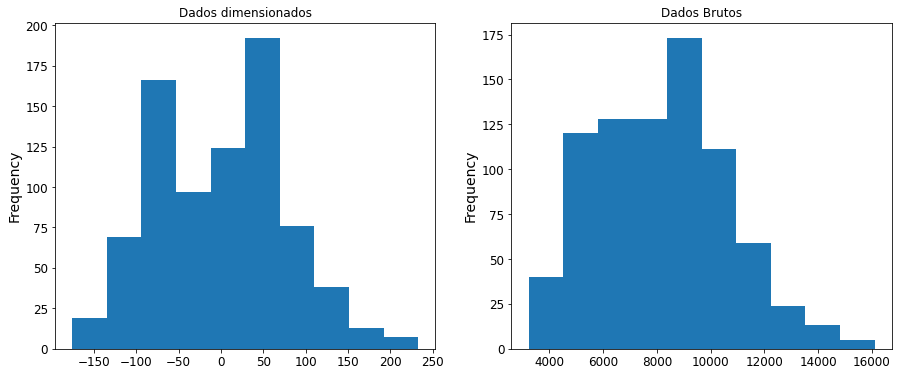

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Dados dimensionados')
BT_scale_serie.plot(kind='hist')
plt.subplot(122)
plt.title('Dados Brutos')
BT_raw_serie.plot(kind='hist')



## K-Means para clusterizar em 5 classes:
1. Lendário
2. Épico
3. Raro
4. Incomum
5. Comum

In [ ]:
X = df_scale_stat[['sp_attack','Power']].values
y = df_scale_stat['is_legendary'].values

X_raw = df_raw_serie[['sp_attack','Power']].values
y_raw = df_raw_serie['is_legendary'].values

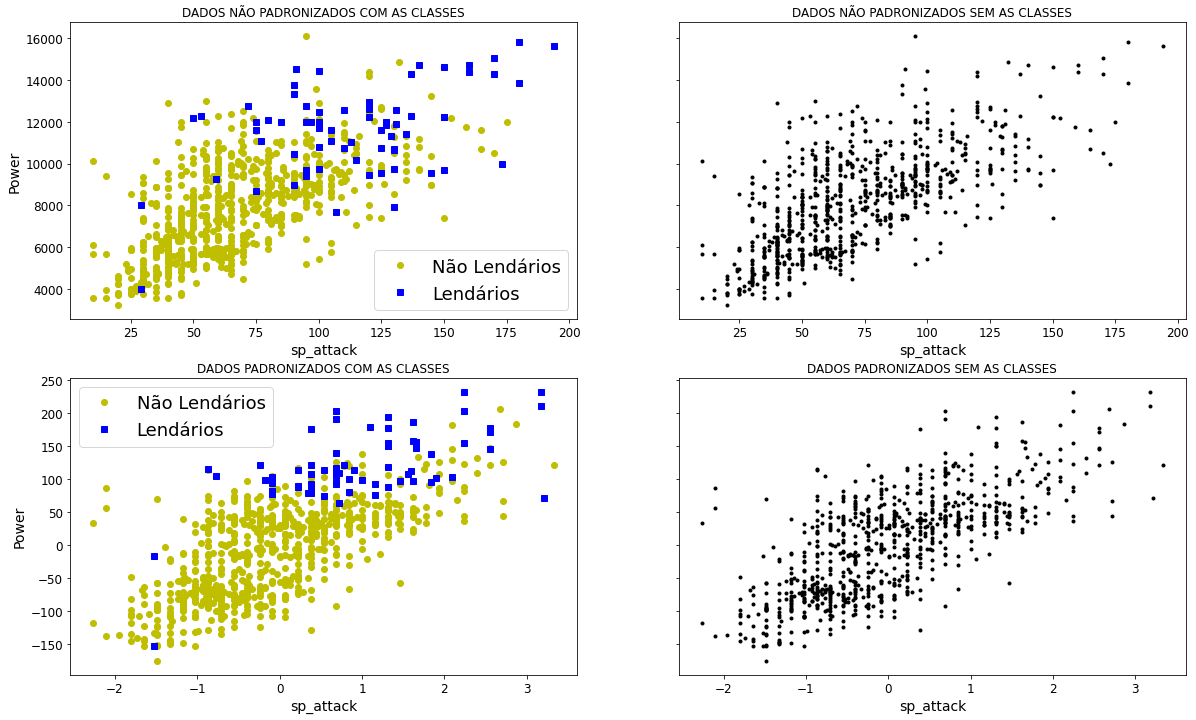

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title('DADOS NÃO PADRONIZADOS COM AS CLASSES')
plt.plot(X_raw[y_raw==0, 0], X_raw[y_raw==0, 1], "yo", label="Não Lendários")
plt.plot(X_raw[y_raw==1, 0], X_raw[y_raw==1, 1], "bs", label="Lendários")

plt.xlabel("sp_attack", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.legend(fontsize=18)

plt.subplot(222)
plt.title('DADOS NÃO PADRONIZADOS SEM AS CLASSES')
plt.scatter(X_raw[:, 0], X_raw[:, 1], c="k", marker=".")
plt.xlabel("sp_attack", fontsize=14)
plt.tick_params(labelleft=False)

plt.subplot(223)
plt.title('DADOS PADRONIZADOS COM AS CLASSES')
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Não Lendários")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Lendários")

plt.xlabel("sp_attack", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.legend(fontsize=18)

plt.subplot(224)
plt.title('DADOS PADRONIZADOS SEM AS CLASSES')
plt.scatter(X[:, 0], X[:, 1], c="k", marker=".")
plt.xlabel("sp_attack", fontsize=14)
plt.tick_params(labelleft=False)



plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=4)
y_pred = kmeans.fit_predict(X)

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'ko')

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$sp_attack$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
         plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

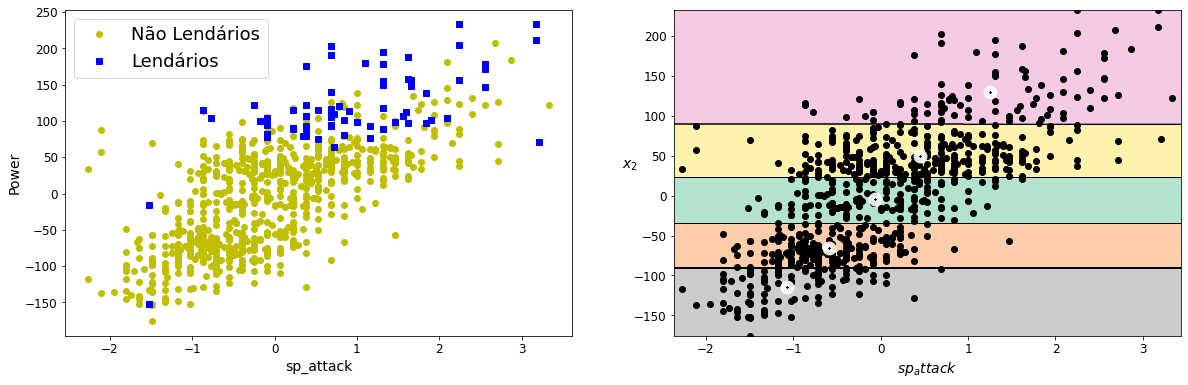

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Não Lendários")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Lendários")

plt.xlabel("sp_attack", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.legend(fontsize=18)

plt.subplot(122)
plot_decision_boundaries(kmeans, X,resolution=1000,show_ylabels=True)
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[-6.41036195e-02, -3.68475816e+00],
       [-5.94903787e-01, -6.59536625e+01],
       [ 1.25405080e+00,  1.29485460e+02],
       [ 4.50088566e-01,  4.94140358e+01],
       [-1.06416167e+00, -1.14043570e+02]])

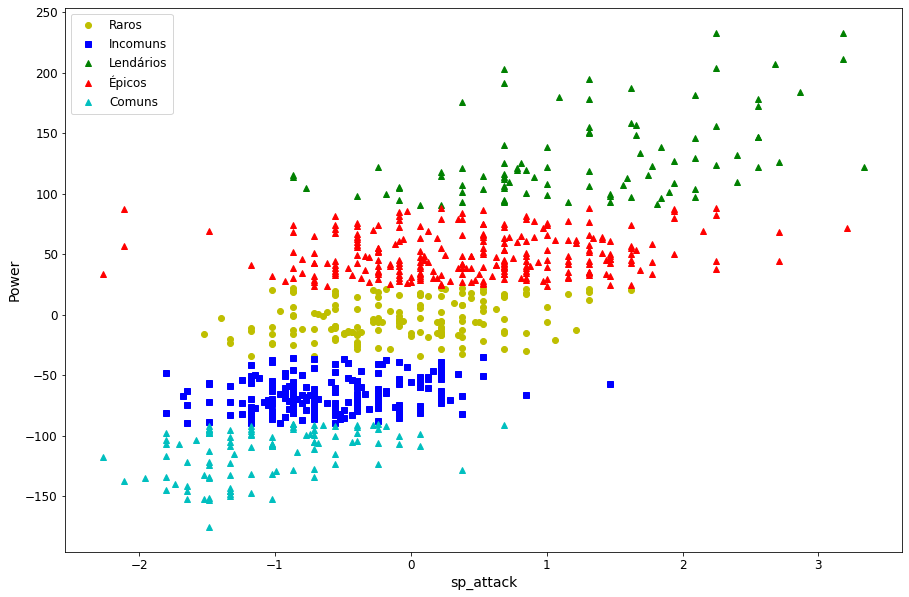

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "yo", label="Raros")
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Incomuns")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "g^", label="Lendários")
plt.plot(X[y_pred==3, 0], X[y_pred==3, 1], "r^", label="Épicos")
plt.plot(X[y_pred==4, 0], X[y_pred==4, 1], "c^", label="Comuns")
plt.xlabel("sp_attack", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [ ]:
df_class = pd.DataFrame(y_pred,columns=['Classe'])
df_class = pd.concat([df_class,df_obj[['name']]],axis=1)
df_class = pd.concat([df_class,df_raw_serie],axis=1)


In [ ]:
def nome_classe(n):
    if n ==0:n='Raro'
    elif n == 1:n='Incomum'
    elif n == 2:n='Lendário'
    elif n == 3:n='Épico'
    else: n = 'Comum'

    return n
df_play =  df_class.copy() #SALVANDO PARA USAR MAIS ABAIXO EM OUTRAS BRINCADEIRAS
df_class.loc[:,'Classe'] = list(map(nome_classe,df_class['Classe']))

In [ ]:
df_class[0:8]

,Classe,name,Power,is_legendary,sp_attack
0,Incomum,Bulbasaur,6121.50,0,65
1,Raro,Ivysaur,7796.25,0,80
2,Lendário,Venusaur,12031.25,0,122
3,Incomum,Charmander,5562.00,0,60
4,Raro,Charmeleon,7290.00,0,80
5,Lendário,Charizard,11729.00,0,159
6,Incomum,Squirtle,5652.00,0,50
7,Raro,Wartortle,7290.00,0,65


#### Resultados do K-means ao separar os lendários.

In [ ]:
TP = len(df_class.loc[(df_class['Classe']=='Lendário')&(df_class['is_legendary']==1)])
TN = len(df_class.loc[(df_class['Classe']!='Lendário')&(df_class['is_legendary']==0)])
FP = len(df_class.loc[(df_class['Classe']=='Lendário')&(df_class['is_legendary']==0)])
FN = len(df_class.loc[(df_class['Classe']!='Lendário')&(df_class['is_legendary']==1)])

In [ ]:
print(f'Acurácia: {(TP+TN)/(TP+TN+FP+FN)} \
        \nPrecisão: {TP/(TP+FP)} \
        \nRevocação: {TP/(TP+FN)} \
        \nF1-Score: {2*((TP/(TP+FP))*(TP/(TP+FN))/((TP/(TP+FN))+(TP/(TP+FP))))}')

Acurácia: 0.9363295880149812         
Precisão: 0.6021505376344086         
Revocação: 0.8         
F1-Score: 0.6871165644171778


Os resultados são extremamente esperados, e nos indicam que poder bruto não é o motivo no qual um pokemón se torna lendário. Podemos ver q ao tentar separar esta classe das demais, acabamos colocando vários pokemóns não lendários na classe lendário.

#Continuando a brincadeira

Os resultados obtidos foram até okay, mas e que tal se fizermos a mesma divisão para as habilidades?

para isso vou considerar das clusters acima a classe dos Pokémons que possuem determinada habilidade.

##Função

Para isso criei uma função que leva em consideração as cluster acima e a variável Power 
onde:

* Lendário = 8pts
* Épico = 6pts
* Raro = 4pts
* Incomum = 2pts
* Comum = 0 pts.

E calcula-se a média de pontos da habilidade da seguinte forma:

Se determinada habilidade X esta presente em Pokémons dos tipos Lendários e Comuns o 
valor da média será:

[(8+0) /2] = 4. 

E se Y estiver presente em Pokémons Lendários, Épicos e 
incomuns a média será:

[(8+6+2) /3] = 5.33.

Esta média é somada ao mínimo entre o menor valor de classes (No caso de X seria 0 – Comuns e para Y seria 2- Incomuns) e 4 e depois dividida por 2 e finalmente dividida por 8, assim 
teremos um resultado entre 0 e 1.

$$Media\_peso\_classe = ((mean(\sum pts)+mins(4,min(pts)))/2)/8$$


In [ ]:
def peso_classes(n):
    if n ==0:n = 2 #Incomuns
    elif n == 1:n = 4 #Raros
    elif n == 2:n = 8 #Lendários
    elif n == 3:n = 6 #Épicos
    else: n = 0 #Comuns

    return n

In [ ]:
def create_data(df,pokemons_com_skill,lista_poderes):


    df.loc[:,'Classe'] = list(map(peso_classes,df['Classe']))
    df.rename(columns={'Classe':'peso_classe'},inplace=True)


    df_skill_power = pd.DataFrame(columns=['skill','media_peso_classe','media_power'])
    df_skill_power.loc[:,'skill'] = lista_poderes 


    for i in range(len(lista_poderes)):
         media_power = df.loc[pokemons_com_skill[i],'Power'].mean()
         
         Tipos = df.loc[pokemons_com_skill[i],'peso_classe'].unique()
         
         
         media_peso_classe = ((np.mean(Tipos) + min(4,min(Tipos))) /2) /8  
         
         df_skill_power.loc[i,['media_peso_classe','media_power']] = media_peso_classe,media_power
    
    return df_skill_power


In [ ]:
#Criando uma lista contendo todos os poderes e os pokemons q possuem este poder


pokemons_com_skill = []
lista_poderes = to_1D(df_obj['abilities']).unique() 

for poder in lista_poderes:
    index = busca_por_poder(poder,df_obj,return_data=False)
    pokemons_com_skill.append(index)


In [ ]:
df = df_play.copy()

In [ ]:
df_skill_power = create_data(df,pokemons_com_skill,lista_poderes)

In [ ]:
df_skill_power.head()

,skill,media_peso_classe,media_power
0,Overgrow,0.4375,8880.91
1,Chlorophyll,0.25,8513.82
2,Blaze,0.4375,7795.39
3,Solar Power,0.25,7624.5
4,Torrent,0.4375,7663.35


In [ ]:
df_skill_power['media_peso_classe'].unique()

array([0.4375, 0.25, 0.1875, 0.625, 0.375, 0.125, 0.16666666666666666,
       0.0625, 0.5625, 0.20833333333333334, 0.3125, 0.5, 0.75,
       0.4583333333333333, 0.0, 0.4166666666666667, 0.6875], dtype=object)

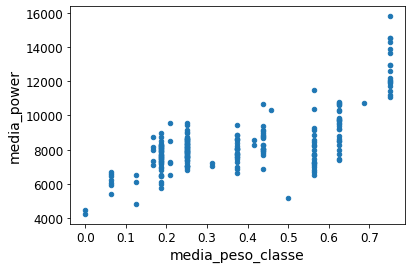

In [ ]:
df_skill_power.plot(kind='scatter',x='media_peso_classe',y='media_power')

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer

In [ ]:
X = MinMaxScaler().fit_transform(df_skill_power[['media_peso_classe','media_power']])

In [ ]:
df_skill_power.loc[:,'media_power'] = X[:,1]

In [ ]:
df_skill_power.head()

,skill,media_peso_classe,media_power
0,Overgrow,0.4375,0.400859
1,Chlorophyll,0.25,0.369049
2,Blaze,0.4375,0.306793
3,Solar Power,0.25,0.291984
4,Torrent,0.4375,0.295351


In [ ]:
X = df_skill_power.loc[:,['media_peso_classe','media_power']].values

#K-means para clusterizar as 5 classes de poder

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=4,init='random',n_init=10)
y_pred = kmeans.fit_predict(X)

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'ko')

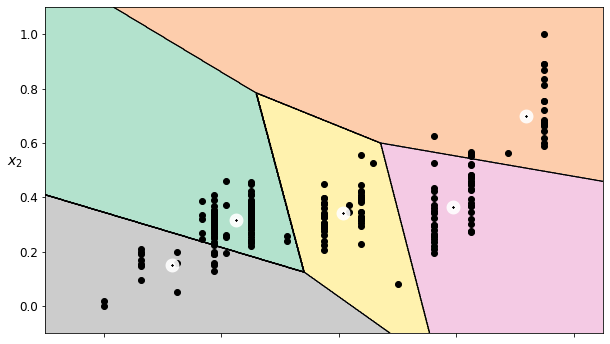

In [ ]:
plt.figure(figsize=(10,6))

plot_decision_boundaries(kmeans, X,resolution=1000,show_ylabels=True,show_xlabels=False)
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[0.22412281, 0.31832123],
       [0.71875   , 0.69848038],
       [0.59375   , 0.36318001],
       [0.4071558 , 0.34093401],
       [0.11666667, 0.15192209]])

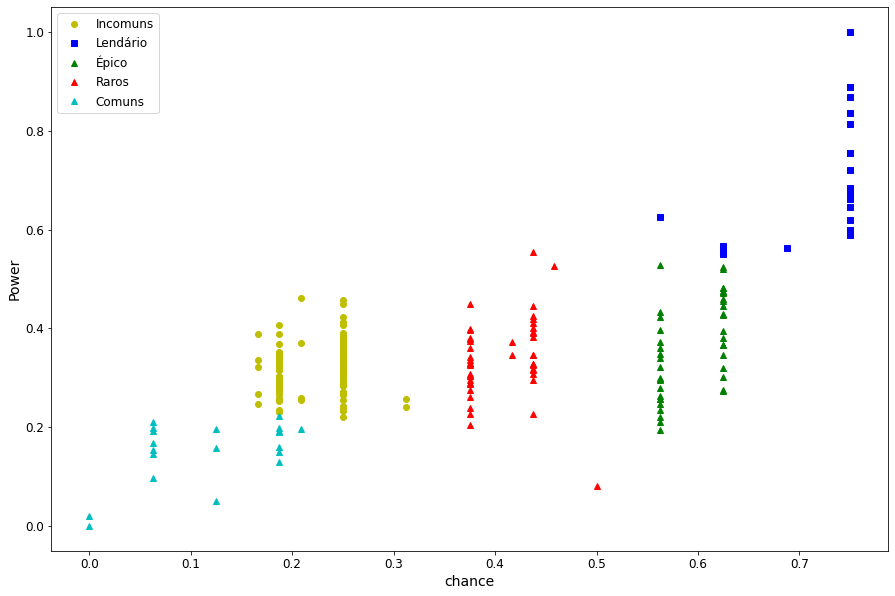

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "yo", label="Incomuns")
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Lendário")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "g^", label="Épico")
plt.plot(X[y_pred==3, 0], X[y_pred==3, 1], "r^", label="Raros")
plt.plot(X[y_pred==4, 0], X[y_pred==4, 1], "c^", label="Comuns")
plt.xlabel("chance", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

#Gerando resultados e dataframes

In [ ]:
y_lend = df_skill_power.loc[y_pred==1,'skill'].values

In [ ]:
skill = compara_len_vs_resto(feature='abilities',dataframe=df_obj)

Total de instancias testadas: 52     
Total de instancias: 207     
Os atributos exclusivos de lendarios para a feature: abilities foram 20    
são eles: {'Beast Boost', 'Bad Dreams', 'Power Construct', 'Full Metal Body', 'Slow Start', 'Dark Aura', 'Shadow Shield', 'Air Lock', 'Turboblaze', 'Grassy Surge', 'Electric Surge', 'Misty Surge', 'Teravolt', 'Psychic Surge', 'Fairy Aura', 'Prism Armor', 'Multitype', 'Soul-Heart', 'Victory Star', 'Aura Break'}


In [ ]:
c = 0
for x in y_lend:
    if x in skill:
        c += 1
        print(f'\r Quantidade {c}',end='')

 Quantidade 17

In [ ]:
def classe_poder(n):
    if n ==0:n='Incomum'
    elif n == 1:n='Lendário'
    elif n == 2:n='Épico'
    elif n == 3:n='Raro'
    else: n = 'Comum'

    return n

In [ ]:
df_class_poder = pd.DataFrame(y_pred,columns=['Classe'])
df_class_poder = pd.concat([df_class_poder,df_skill_power],axis=1)

In [ ]:
df_class_poder.loc[:,'Classe'] = list(map(classe_poder,df_class_poder['Classe']))

In [ ]:
df_class_poder

,Classe,skill,media_peso_classe,media_power
0,Raro,Overgrow,0.4375,0.400859
1,Incomum,Chlorophyll,0.25,0.369049
2,Raro,Blaze,0.4375,0.306793
3,Incomum,Solar Power,0.25,0.291984
4,Raro,Torrent,0.4375,0.295351
...,...,...,...,...
222,Lendário,Full Metal Body,0.75,0.588821
223,Lendário,Shadow Shield,0.75,0.868718
224,Lendário,Beast Boost,0.6875,0.562701
225,Lendário,Prism Armor,0.75,0.671144


In [ ]:
for x in skill:
    if x not in y_lend:
        display(df_class_poder[df_class_poder['skill']==x])
        

,Classe,skill,media_peso_classe,media_power
218,Épico,Electric Surge,0.625,0.446274


,Classe,skill,media_peso_classe,media_power
221,Épico,Misty Surge,0.625,0.470971


,Classe,skill,media_peso_classe,media_power
226,Épico,Soul-Heart,0.625,0.320191


In [ ]:
df_cluster = pd.DataFrame()
df_cluster['Pokemon'] = df_obj['name']
df_cluster['Poderes'] = df_obj['abilities']
df_cluster['Classe_Poder(Cluster)'] = ''
df_cluster['Classe_Pokémon(Cluster)'] = df_class['Classe']
df_cluster['is_legendary'] = legendary

In [ ]:

for poder in sorted(df_class_poder['skill'].values):
    X = busca_por_poder(poder,df_obj,return_data=False)
    df_cluster.loc[X,'Classe_Poder(Cluster)'] = df_class_poder.loc[df_class_poder['skill']==poder,'Classe'].values[0]+','+df_cluster.loc[X,'Classe_Poder(Cluster)']

In [ ]:
df_cluster[750:800]

,Pokemon,Poderes,Classe_Poder(Cluster),Classe_Pokémon(Cluster),is_legendary
750,Dewpider,"[Water Bubble, Water Absorb]","Comum,Incomum,",Comum,0
751,Araquanid,"[Water Bubble, Water Absorb]","Comum,Incomum,",Raro,0
752,Fomantis,"[Leaf Guard, Contrary]","Incomum,Incomum,",Comum,0
753,Lurantis,"[Leaf Guard, Contrary]","Incomum,Incomum,",Épico,0
754,Morelull,"[Illuminate, Effect Spore, Rain Dish]","Incomum,Incomum,Incomum,",Comum,0
755,Shiinotic,"[Illuminate, Effect Spore, Rain Dish]","Incomum,Incomum,Incomum,",Raro,0
756,Salandit,"[Corrosion, Oblivious]","Incomum,Épico,",Incomum,0
757,Salazzle,"[Corrosion, Oblivious]","Incomum,Épico,",Épico,0
758,Stufful,"[Fluffy, Klutz, Cute Charm]","Raro,Épico,Incomum,",Incomum,0
759,Bewear,"[Fluffy, Klutz, Unnerve]","Raro,Raro,Épico,",Épico,0
